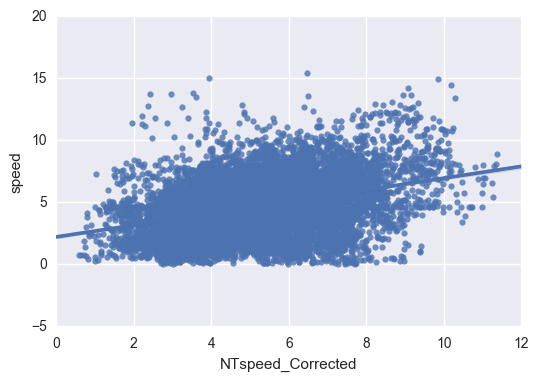

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
train = pd.read_csv("D:/pyplace/WindPower/PredictData_20161226.csv")
sns.regplot(x = 'NTspeed_Corrected', y = 'speed', data = train)

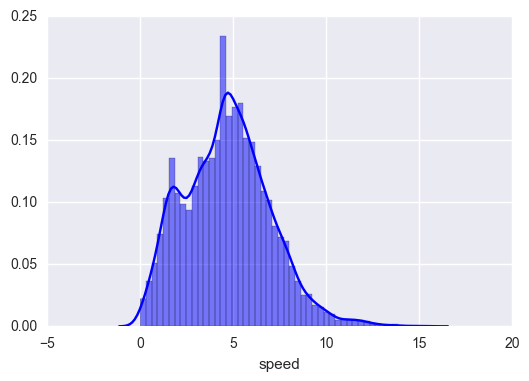

In [2]:
sns.distplot(train['speed'], kde = True, color = 'b', hist_kws={'alpha': 0.5})

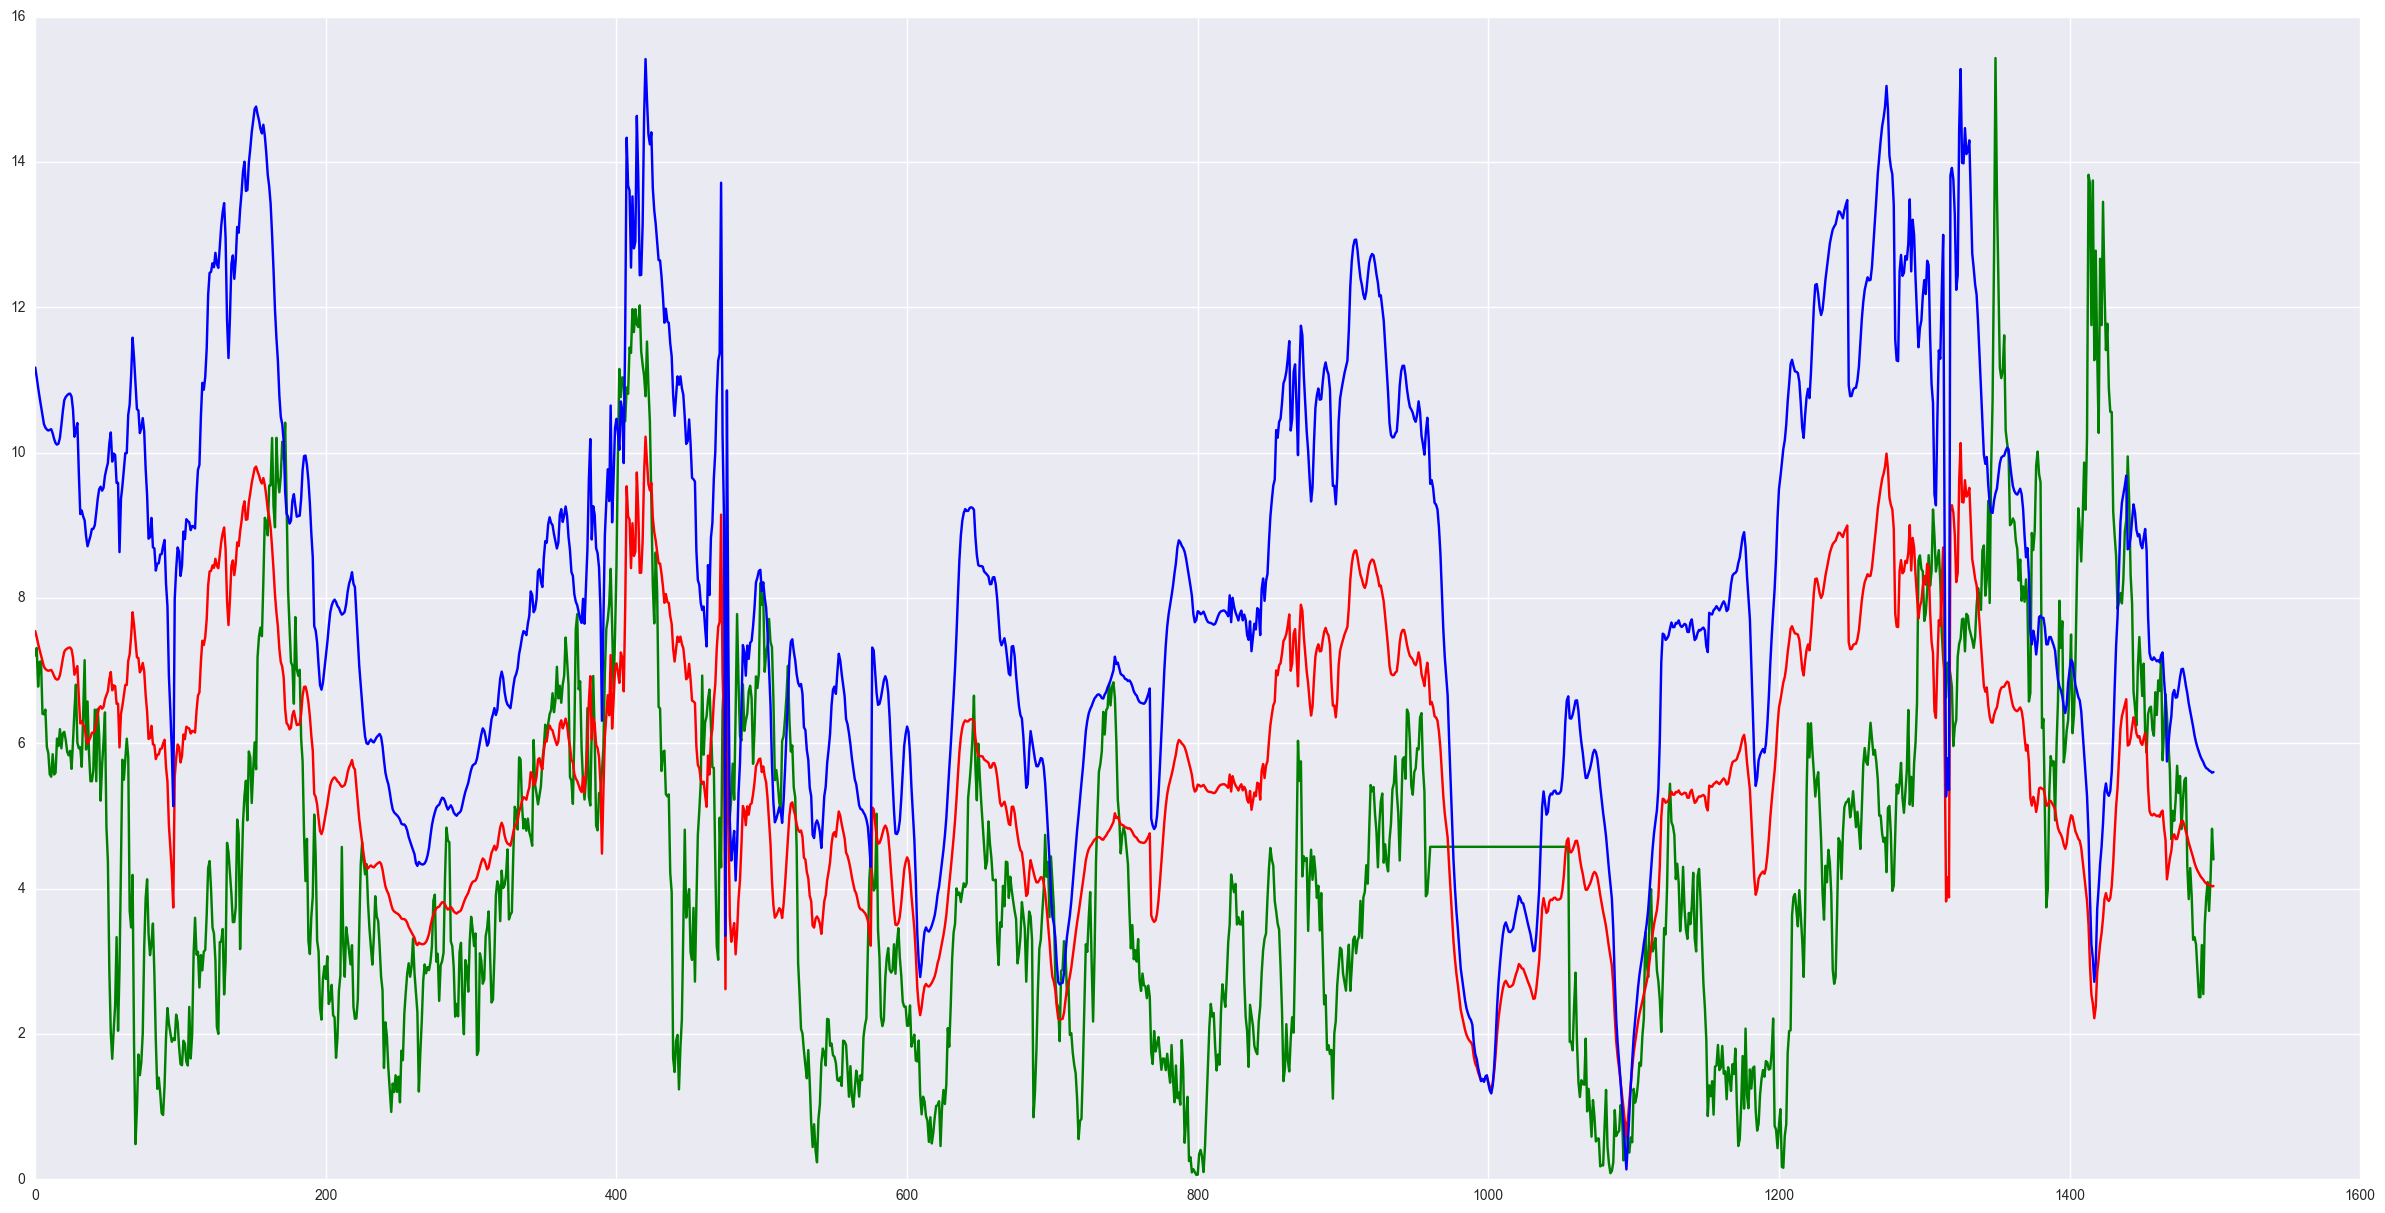

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=[30,15]) # 创建图表1
x = train['Id'][:1500]
plt.plot(x,train['speed'][:1500],color='g')
plt.plot(x,train['NTspeed_Corrected'][:1500],color='r')
plt.plot(x,train['speed_out_ncl'][:1500],color='b')
plt.show()

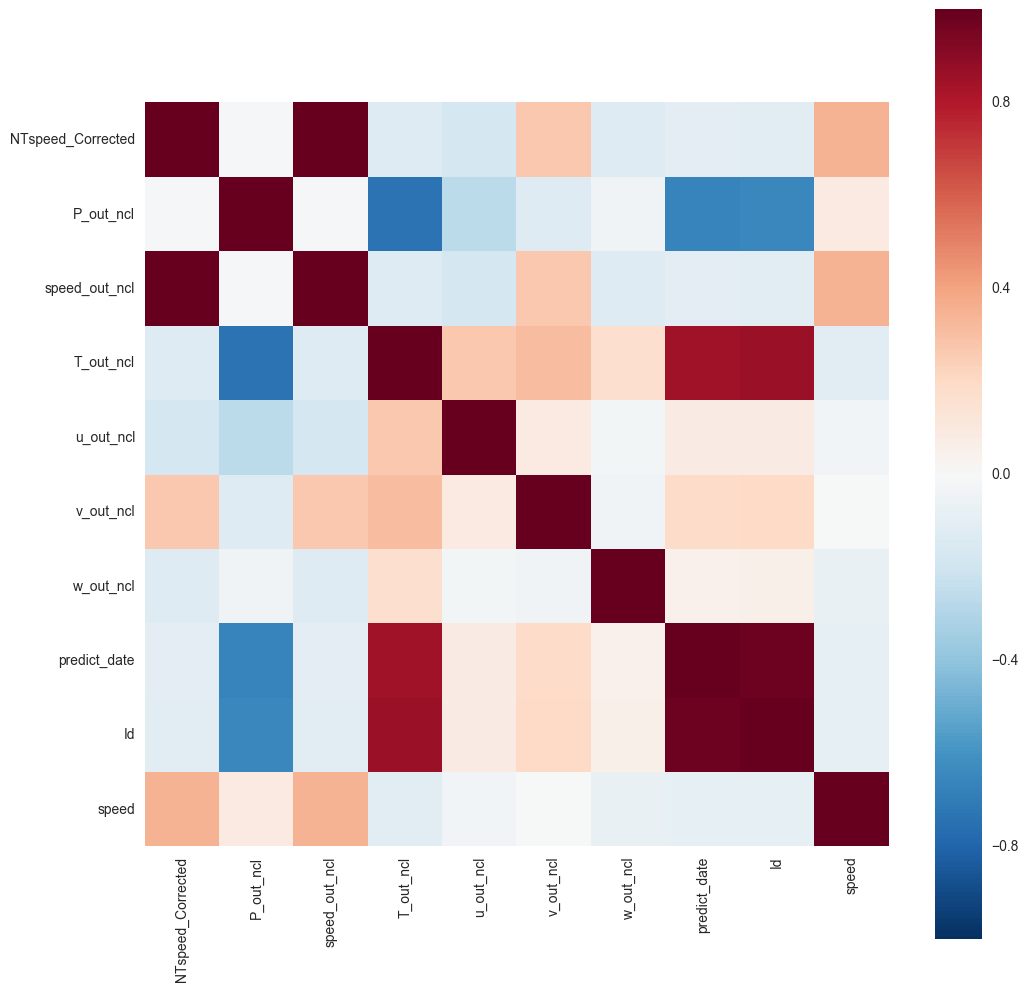

In [4]:
corr = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [5]:
cor_dict = corr['speed'].to_dict()
del cor_dict['speed']
print("List the numerical features decendingly by their correlation with Score:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Score:

speed_out_ncl: 	0.346313979847
NTspeed_Corrected: 	0.346313846322
T_out_ncl: 	-0.112086408312
P_out_ncl: 	0.0935830672666
Id: 	-0.0906316385272
predict_date: 	-0.0901637426927
w_out_ncl: 	-0.0711614698177
u_out_ncl: 	-0.035849639818
v_out_ncl: 	-6.80718751839e-05


In [8]:
#!/usr/bin/python
#-*- coding:utf-8 -*-
from sklearn.cross_validation import  train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import xgboost as xgb
class InsuranceRiskPredict:
      def preprocessing(self):
            train = pd.read_csv("D:/pyplace/WindPower/PredictData_20161226.csv")
            self.train_y = train['speed']
            train = train.drop('speed',axis=1)
            train = train.drop('predict_date',axis=1)
            train = train.drop('TimeSeries',axis=1)
            train = train.drop('speed_out_ncl',axis=1)
            train = train.drop('time_second',axis=1)
            #train = train.drop('subId',axis=1)
            self.train_x = train.drop('Id',axis=1)
      def trainModel(self):
            #X_train,X_valid,y_train,y_valid = train_test_split(self.train_x,self.train_y,test_size=.25)
            X_train = self.train_x[0:8063]
            y_train = self.train_y[0:8063]
            X_valid = self.train_x[8063:]
            y_valid = self.train_y[8063:]
            d_train = xgb.DMatrix(X_train, label=y_train)
            d_valid = xgb.DMatrix(X_valid, label=y_valid)
            watchlist = [(d_train, 'train'), (d_valid, 'valid')]
            #模型2
            params = {}
            params['eta'] = 0.15
            params['booster'] = 'gbtree'
            params['base_score'] = 0.2
            params['max_depth'] = 3
            params['silent'] = 1
            params['min_child_weight'] = 1
            params['subsample'] = 4
            params['colsample_bytree'] = 0.8
            params['lambda'] = 1
            params['alpha'] = 1
            params['n_estimators'] = 100
            params['scale_pos_weight'] = 1
            self.regr2 = xgb.train(params, d_train, 500, evals = watchlist, early_stopping_rounds=50)
            y2_pred = self.regr2.predict(xgb.DMatrix(X_valid))
            #y2_pred.to_csv('predict.csv')
            pd.DataFrame(y2_pred)
            rmse = (np.sqrt(mean_squared_error(y_valid, y2_pred)))/14.0
            rmse_init = (np.sqrt(mean_squared_error(y_valid, X_valid['NTspeed_Corrected'])))/14.0
            print ("gbtree rmse:%.5f" %rmse)
            print ("rmse:%.5f" %rmse_init)
      def run(self):
            self.preprocessing()
            self.trainModel()
work = InsuranceRiskPredict()
work.run()

Will train until valid error hasn't decreased in 50 rounds.
[0]	train-rmse:4.529216	valid-rmse:4.110796
[1]	train-rmse:4.018609	valid-rmse:3.678868
[2]	train-rmse:3.595072	valid-rmse:3.324492
[3]	train-rmse:3.247568	valid-rmse:3.008872
[4]	train-rmse:2.968660	valid-rmse:2.770975
[5]	train-rmse:2.750982	valid-rmse:2.593143
[6]	train-rmse:2.572702	valid-rmse:2.443367
[7]	train-rmse:2.439295	valid-rmse:2.346887
[8]	train-rmse:2.335709	valid-rmse:2.255965
[9]	train-rmse:2.250908	valid-rmse:2.173956
[10]	train-rmse:2.187227	valid-rmse:2.134486
[11]	train-rmse:2.132833	valid-rmse:2.091326
[12]	train-rmse:2.097004	valid-rmse:2.059600
[13]	train-rmse:2.067476	valid-rmse:2.043587
[14]	train-rmse:2.035600	valid-rmse:2.029149
[15]	train-rmse:2.015844	valid-rmse:2.018408
[16]	train-rmse:1.992248	valid-rmse:2.012272
[17]	train-rmse:1.980093	valid-rmse:2.004662
[18]	train-rmse:1.967517	valid-rmse:1.993555
[19]	train-rmse:1.957359	valid-rmse:1.991979
[20]	train-rmse:1.948061	valid-rmse:1.995633
[21]	

gbtree rmse:0.14381
rmse:0.14652


In [179]:
#!/usr/bin/python
#-*- coding:utf-8 -*-
from sklearn.cross_validation import  train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import xgboost as xgb
class InsuranceRiskPredict:
      def preprocessing(self):
            train = pd.read_csv("D:/pyplace/WindPower/hisRawData.csv")
            train = train[train.status==11]
            train = train[train.power>0]
            train = train[(train.speed>0)]
            train = train[['Id','speed','power']]
            self.train_y = train['power']
            train = train.drop('power',axis=1)
            self.train_x = train
      def trainModel(self): 
            X_train,X_valid,y_train,y_valid = train_test_split(self.train_x,self.train_y,test_size=.25)
            #from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,RandomForestClassifier
            #regr = GradientBoostingRegressor(n_estimators=300)
            #regr.fit(X_train,y_train)
            #y2_pred =regr.predict(X_valid)
            d_train = xgb.DMatrix(X_train, label=y_train)
            d_valid = xgb.DMatrix(X_valid, label=y_valid)
            watchlist = [(d_train, 'train'), (d_valid, 'valid')]
            params = {}
            params['eta'] = 0.1
            params['booster'] = 'gbtree'
            params['base_score'] = 0.2
            params['max_depth'] = 3
            params['silent'] = 1
            params['min_child_weight'] = 1
            params['subsample'] = 4
            params['n_estimators'] = 100
            params['colsample_bytree'] = 0.8
            self.regr2 = xgb.train(params, d_train, 300, evals = watchlist, early_stopping_rounds=50)
            y2_pred = self.regr2.predict(xgb.DMatrix(X_valid))
            rmse = (np.sqrt(mean_squared_error(y_valid, y2_pred)))
            print ("linear rmse:%.5f" %rmse)
      def run(self):
            self.preprocessing()
            self.trainModel()
work = InsuranceRiskPredict()
work.run()

Will train until valid error hasn't decreased in 50 rounds.
[0]	train-rmse:451.561096	valid-rmse:453.746765
[1]	train-rmse:408.694183	valid-rmse:411.205170
[2]	train-rmse:387.343964	valid-rmse:389.266571
[3]	train-rmse:351.116730	valid-rmse:353.423584
[4]	train-rmse:318.562103	valid-rmse:321.056824
[5]	train-rmse:289.392578	valid-rmse:292.042084
[6]	train-rmse:263.406860	valid-rmse:266.270966
[7]	train-rmse:251.867523	valid-rmse:254.432816
[8]	train-rmse:229.975311	valid-rmse:232.977081
[9]	train-rmse:220.541931	valid-rmse:223.374054
[10]	train-rmse:202.115768	valid-rmse:205.306824
[11]	train-rmse:195.013916	valid-rmse:198.118637
[12]	train-rmse:179.517334	valid-rmse:183.084732
[13]	train-rmse:165.877991	valid-rmse:169.930679
[14]	train-rmse:161.229401	valid-rmse:165.306808
[15]	train-rmse:149.733826	valid-rmse:154.451599
[16]	train-rmse:139.750809	valid-rmse:145.018860
[17]	train-rmse:136.776184	valid-rmse:142.088013
[18]	train-rmse:128.472015	valid-rmse:134.371323
[19]	train-rmse:121

linear rmse:89.18300


[160]	train-rmse:72.465538	valid-rmse:89.151207
[161]	train-rmse:72.430893	valid-rmse:89.106415
[162]	train-rmse:72.391182	valid-rmse:89.149986
[163]	train-rmse:72.339691	valid-rmse:89.117813
[164]	train-rmse:72.302567	valid-rmse:89.174713
[165]	train-rmse:72.221825	valid-rmse:89.110794
[166]	train-rmse:72.189888	valid-rmse:89.127571
[167]	train-rmse:72.174179	valid-rmse:89.139999
[168]	train-rmse:72.150726	valid-rmse:89.185463
[169]	train-rmse:72.129074	valid-rmse:89.212837
[170]	train-rmse:72.093414	valid-rmse:89.182999
Stopping. Best iteration:
[120]	train-rmse:74.215042	valid-rmse:88.773285



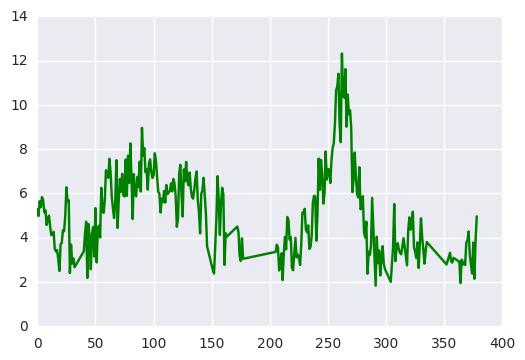

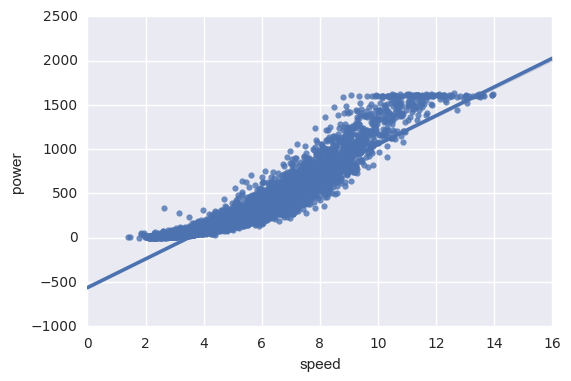

In [158]:
import numpy as np
import matplotlib.pyplot as plt
#plt.figure(figsize=[30,15]) # 创建图表1
train = pd.read_csv("D:/pyplace/WindPower/hisRawData.csv")
train = train[train.status==11]
train = train[train.power>0]
train = train[(train.speed>0)]
train = train[['Id','speed','power']]
x = train['Id'][:300]
plt.plot(x,train['speed'][:300],color='g')
#plt.plot(x,train['power'][:1500],color='r')
plt.show()
import seaborn as sns
sns.regplot(x = 'speed', y = 'power', data = train)

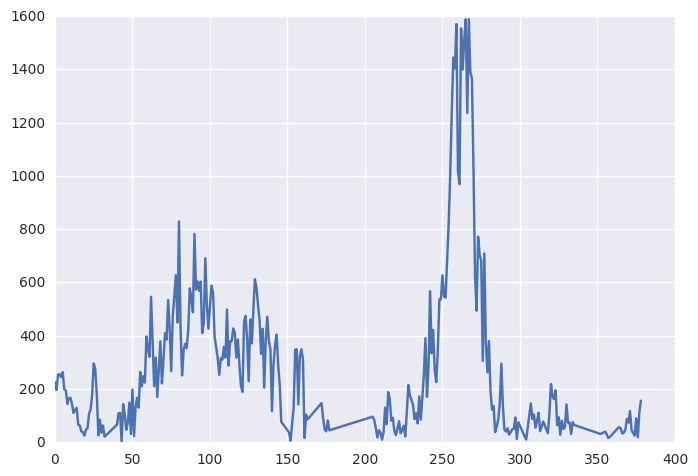

In [136]:
import numpy as np
import matplotlib.pyplot as plt
#plt.figure(figsize=[30,15]) # 创建图表1
train = pd.read_csv("D:/pyplace/WindPower/hisRawData.csv")
train = train[train.status==11]
train = train[train.power>0]
train = train[train.speed>0]
train = train[['Id','speed','power']]
x = train['Id'][:300]
plt.plot(x,train['power'][:300])
plt.show()

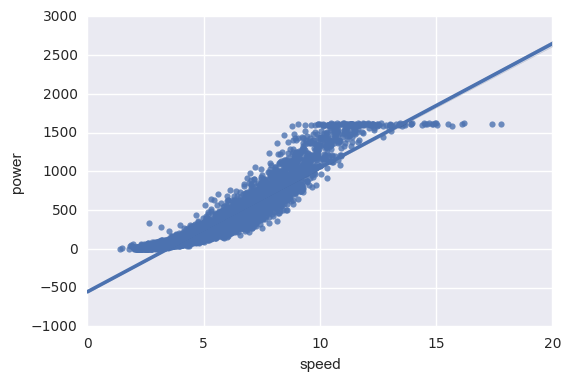

In [160]:
train = pd.read_csv("D:/pyplace/WindPower/hisRawData.csv")
import seaborn as sns
train = train[train.status==11]
train = train[(train.power>0)]
train = train[(train.speed>0)]
%matplotlib inline
sns.regplot(x = 'speed', y = 'power', data = train)

                        speed
time_second                  
2016-04-01 00:15:00  5.282014
2016-04-01 00:30:00  4.978418
2016-04-01 00:45:00  5.646361
2016-04-01 01:00:00  5.380768
2016-04-01 01:15:00  5.834048


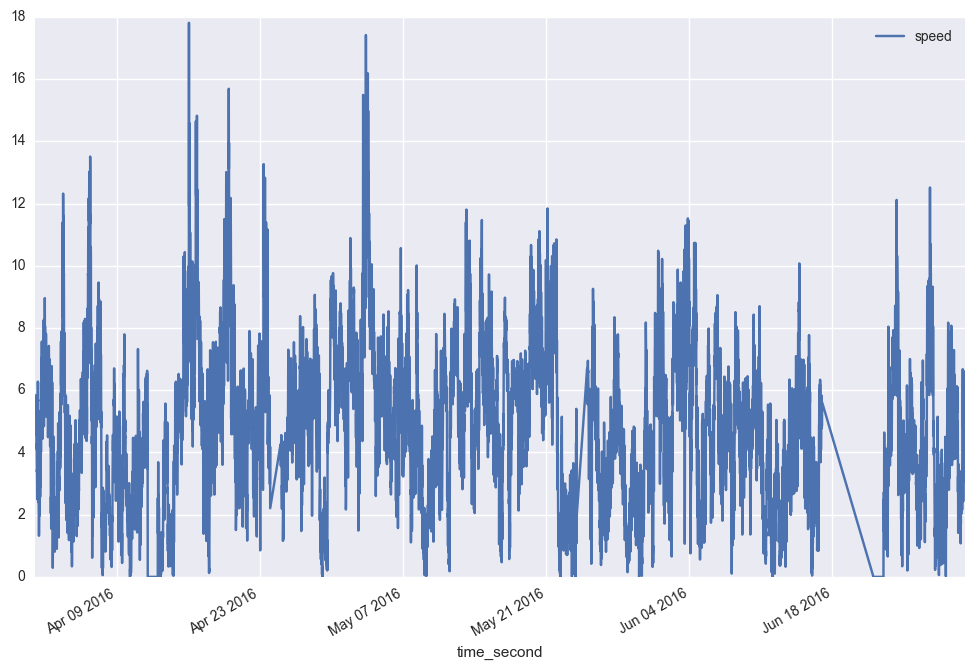

In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S') 
dta = pd.read_csv('D:/pyplace/WindPower/hisRawData_new.csv', parse_dates='time_second', index_col='time_second',date_parser=dateparse)
dta = dta[:8064]
print dta.head()
dta.plot(figsize=(12,8))
plt.show()

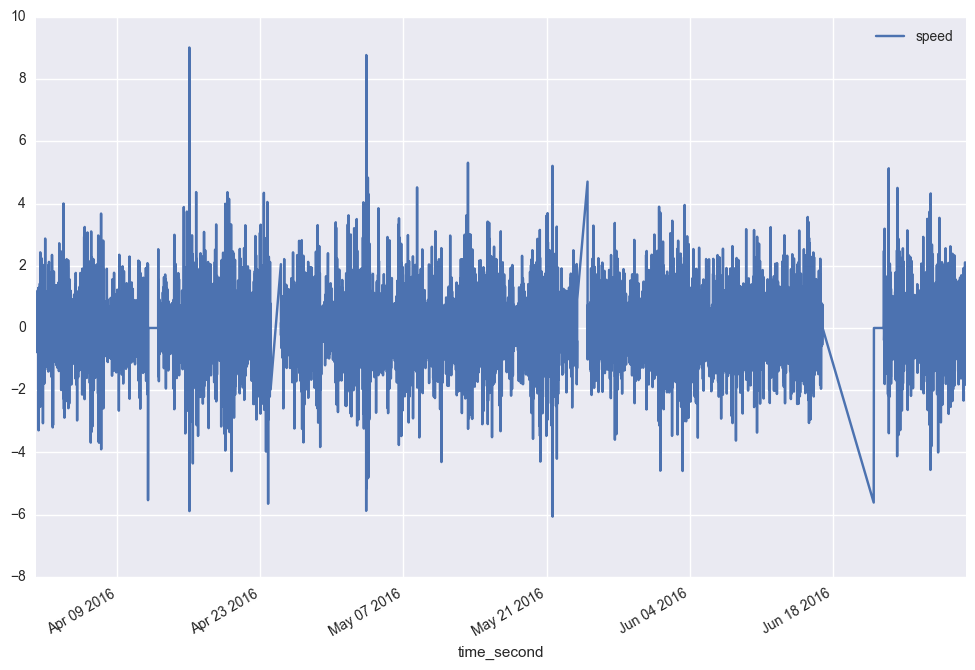

In [3]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

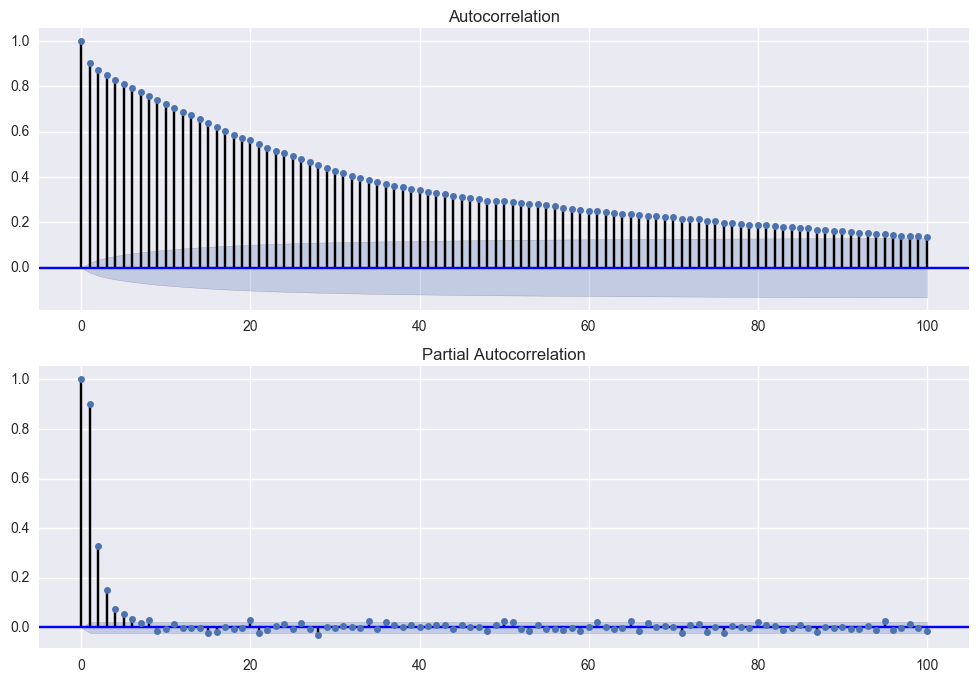

In [4]:
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta,lags=100,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=100,ax=ax2)

In [5]:
arma_mod70 = sm.tsa.ARMA(dta,(7,0)).fit()
print(arma_mod70.aic,arma_mod70.bic,arma_mod70.hqic)
arma_mod30 = sm.tsa.ARMA(dta,(2,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod71 = sm.tsa.ARMA(dta,(7,1)).fit()
print(arma_mod71.aic,arma_mod71.bic,arma_mod71.hqic)
arma_mod80 = sm.tsa.ARMA(dta,(1,1)).fit()
print(arma_mod80.aic,arma_mod80.bic,arma_mod80.hqic)

(23495.180465544443, 23558.136950457243, 23516.720835318705)
(23490.259922449888, 23525.235747401442, 23502.226794546703)
(23494.56226618007, 23564.513916083182, 23518.496010373696)
(23498.850951953104, 23526.831611914349, 23508.424449630555)


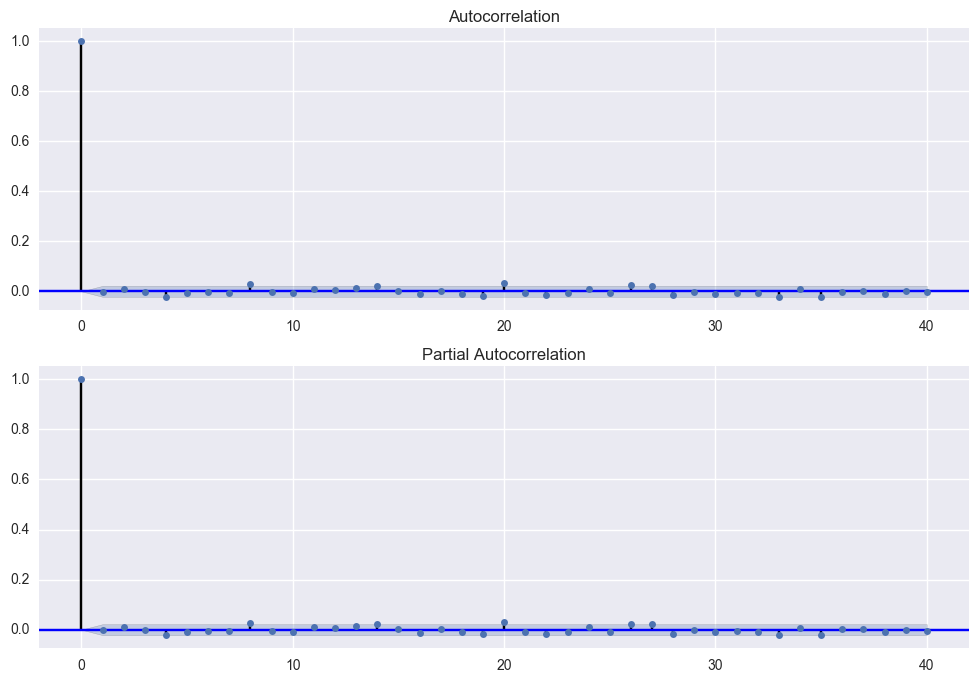

In [6]:
resid = arma_mod30.resid 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)
plt.show()

In [17]:
print(sm.stats.durbin_watson(arma_mod30.resid.values))

2.00159064798


(554.92573721392239, 3.1579644079138884e-121)


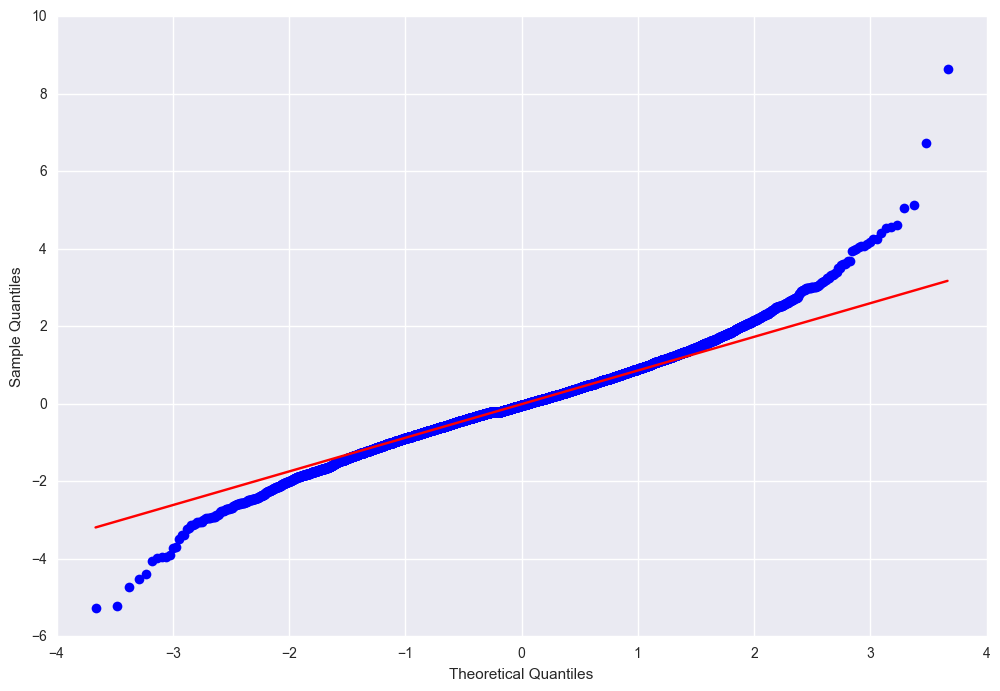

In [7]:
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
plt.show()

In [8]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

           AC          Q  Prob(>Q)
lag                               
1   -0.000812   0.005324  0.941835
2    0.010455   0.887212  0.641718
3   -0.003303   0.975228  0.807246
4   -0.021127   4.577359  0.333473
5   -0.007706   5.056649  0.409006
6   -0.003947   5.182414  0.520639
7   -0.006826   5.558591  0.592126
8    0.028473  12.104068  0.146621
9   -0.004550  12.271271  0.198445
10  -0.008509  12.856016  0.231834
11   0.010845  13.805935  0.243919
12   0.006390  14.135741  0.292124
13   0.013626  15.635673  0.269364
14   0.022633  19.774695  0.137406
15   0.001336  19.789115  0.180173
16  -0.011219  20.806380  0.186074
17   0.002084  20.841480  0.233461
18  -0.009444  21.562531  0.251988
19  -0.018119  24.216916  0.187963
20   0.031315  32.146130  0.041766
21  -0.008576  32.740852  0.049171
22  -0.013618  34.240891  0.046422
23  -0.007738  34.725290  0.055373
24   0.008896  35.365565  0.063161
25  -0.007121  35.775907  0.075070
26   0.024069  40.463850  0.035109
27   0.019990  43.69

In [10]:
predict_dta = arma_mod30.predict('2016-07-01 00:00:00', '2016-07-02 00:00:00', dynamic=True)
predict_dta = predict_dta.shift(1)
predict_dta = predict_dta.shift(1)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix[:].plot(ax=ax)
fig = arma_mod80.plot_predict('2016-07-01 00:00:00', '2016-07-02 00:00:00', dynamic=True, ax=ax, plot_insample=False)
plt.show()

ValueError: Must provide freq argument if no data is supplied

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from datetime import datetime
%matplotlib inline
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S') 
dta = pd.read_csv('D:/pyplace/WindPower/hisRawData_new.csv', parse_dates='time_second', index_col='time_second',date_parser=dateparse)
dta = dta[:2000]
ts = dta['speed']
ts.head().index

In [38]:
# -*- coding:utf-8 -*-
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 移动平均图
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = pd.rolling_mean(timeSeries,window=size)
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.ewma(timeSeries, span=size)

    timeSeries.plot(color='blue', label='Original')
    rolmean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为31阶
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=31, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=31, ax=ax2)
    plt.show()

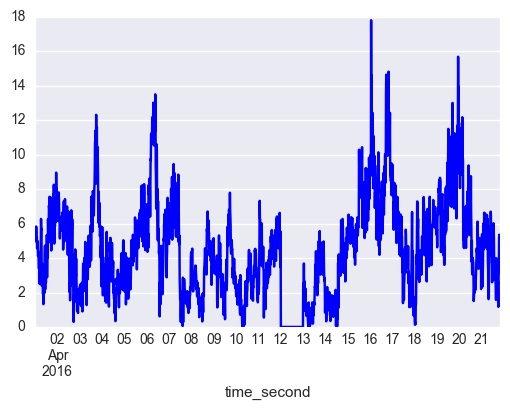

In [44]:
draw_ts(ts)

In [46]:
draw_trend(ts, 12)

AttributeError: 'Series' object has no attribute 'rolling'

bic: -2259.25843891 p: 0 q: 1
[-0.02092968]
-0.0211425494836


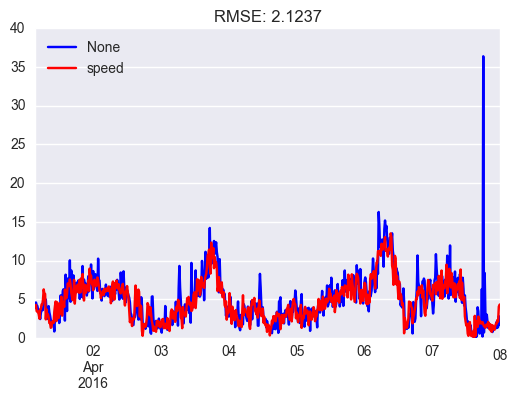

In [102]:
# -*-coding:utf-8-*-
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARMA
import sys
from dateutil.relativedelta import relativedelta
from copy import deepcopy
import matplotlib.pyplot as plt

class arima_model:

    def __init__(self, ts, maxLag=2):
        self.data_ts = ts
        self.resid_ts = None
        self.predict_ts = None
        self.maxLag = maxLag
        self.p = maxLag
        self.q = maxLag
        self.properModel = None
        self.bic = sys.maxint

    # 计算最优ARIMA模型，将相关结果赋给相应属性
    def get_proper_model(self):
        self._proper_model()
        self.predict_ts = deepcopy(self.properModel.predict())
        self.resid_ts = deepcopy(self.properModel.resid)

    # 对于给定范围内的p,q计算拟合得最好的arima模型，这里是对差分好的数据进行拟合，故差分恒为0
    def _proper_model(self):
        for p in np.arange(self.maxLag):
            for q in np.arange(self.maxLag):
                # print p,q,self.bic
                model = ARMA(self.data_ts, order=(p, q))
                try:
                    results_ARMA = model.fit(disp=-1, method='css')
                except:
                    continue
                bic = results_ARMA.bic
                # print 'bic:',bic,'self.bic:',self.bic
                if bic < self.bic:
                    self.p = p
                    self.q = q
                    self.properModel = results_ARMA
                    self.bic = bic
                    self.resid_ts = deepcopy(self.properModel.resid)
                    self.predict_ts = self.properModel.predict()

    # 参数确定模型
    def certain_model(self, p, q):
            model = ARMA(self.data_ts, order=(p, q))
            try:
                self.properModel = model.fit( disp=-1, method='css')
                self.p = p
                self.q = q
                self.bic = self.properModel.bic
                self.predict_ts = self.properModel.predict()
                self.resid_ts = deepcopy(self.properModel.resid)
            except:
                print 'You can not fit the model with this parameter p,q, ' \
                      'please use the get_proper_model method to get the best model'

    # 预测第二日的值
    def forecast_next_day_value(self, type='day'):
        # 我修改了statsmodels包中arima_model的源代码，添加了constant属性，需要先运行forecast方法，为constant赋值
        self.properModel.forecast()
        if self.data_ts.index[-1] != self.resid_ts.index[-1]:
            raise ValueError('''The index is different in data_ts and resid_ts, please add new data to data_ts.
            If you just want to forecast the next day data without add the real next day data to data_ts,
            please run the predict method which arima_model included itself''')
        if not self.properModel:
            raise ValueError('The arima model have not computed, please run the proper_model method before')
        para = self.properModel.params

        # print self.properModel.params
        if self.p == 0:   # It will get all the value series with setting self.data_ts[-self.p:] when p is zero
            ma_value = self.resid_ts[-self.q:]
            values = ma_value.reindex(index=ma_value.index[::-1])
        elif self.q == 0:
            ar_value = self.data_ts[-self.p:]
            values = ar_value.reindex(index=ar_value.index[::-1])
        else:
            ar_value = self.data_ts[-self.p:]
            ar_value = ar_value.reindex(index=ar_value.index[::-1])
            ma_value = self.resid_ts[-self.q:]
            ma_value = ma_value.reindex(index=ma_value.index[::-1])
            values = ar_value.append(ma_value)

        predict_value = np.dot(para[1:], values) 
        self._add_new_data(self.predict_ts, predict_value, type)
        return predict_value

    # 动态添加数据函数，针对索引是月份和日分别进行处理
    def _add_new_data(self, ts, dat, type='day'):
        if type == 'day':
            new_index = ts.index[-1] + relativedelta(days=1)
        elif type == 'month':
            new_index = ts.index[-1] + relativedelta(months=1)
        ts[new_index] = dat

    def add_today_data(self, dat, type='day'):
        self._add_new_data(self.data_ts, dat, type)
        if self.data_ts.index[-1] != self.predict_ts.index[-1]:
            raise ValueError('You must use the forecast_next_day_value method forecast the value of today before')
        self._add_new_data(self.resid_ts, self.data_ts[-1] - self.predict_ts[-1], type)

if __name__ == '__main__':
    #df = pd.read_csv('AirPassengers.csv', encoding='utf-8', index_col='date')
    #df.index = pd.to_datetime(df.index)
    #ts = df['x']
    dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S') 
    dta = pd.read_csv('D:/pyplace/WindPower/hisRawData_new.csv', parse_dates='time_second', index_col='time_second',date_parser=dateparse)
    dta = dta[:672]
    df = dta
    ts = dta['speed']

    # 数据预处理
    ts_log = np.log(ts)
    rol_mean = pd.rolling_mean(ts_log,window=12)
    rol_mean.dropna(inplace=True)
    ts_diff_1 = rol_mean.diff(1)
    ts_diff_1.dropna(inplace=True)
    ts_diff_2 = ts_diff_1.diff(1)
    ts_diff_2.dropna(inplace=True)

    # 模型拟合
    model = arima_model(ts_diff_2)
    #  这里使用模型参数自动识别
    model.get_proper_model()
    print 'bic:', model.bic, 'p:', model.p, 'q:', model.q
    print model.properModel.forecast()[0]
    print model.forecast_next_day_value(type='month')

    # 预测结果还原
    predict_ts = model.properModel.predict()
    diff_shift_ts = ts_diff_1.shift(1)
    diff_recover_1 = predict_ts.add(diff_shift_ts)
    rol_shift_ts = rol_mean.shift(1)
    diff_recover = diff_recover_1.add(rol_shift_ts)
    rol_sum = pd.rolling_sum(ts_log,window=11)
    rol_recover = diff_recover*12 - rol_sum.shift(1)
    log_recover = np.exp(rol_recover)
    log_recover.dropna(inplace=True)

    # 预测结果作图
    ts = ts[log_recover.index]
    plt.figure(facecolor='white')
    log_recover.plot(color='blue', label='Predict')
    ts.plot(color='red', label='Original')
    plt.legend(loc='best')
    plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
    plt.show()

bic: 1382.31959499 p: 1 q: 1
[-0.05701379]


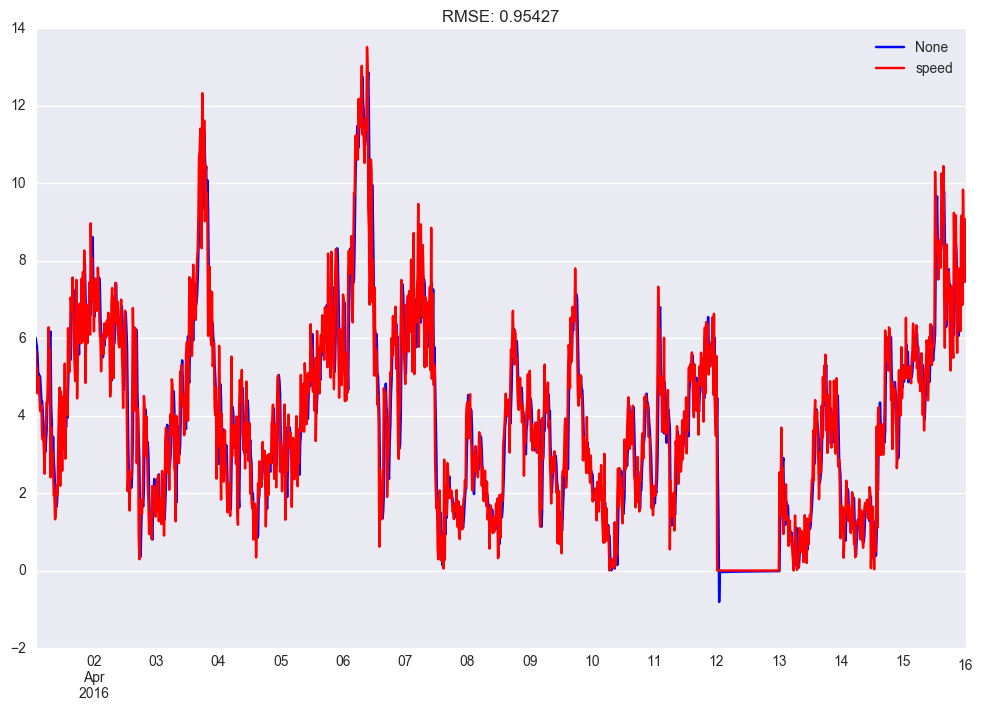

In [146]:
# -*-coding:utf-8-*-
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARMA
import sys
from dateutil.relativedelta import relativedelta
from copy import deepcopy
import matplotlib.pyplot as plt

class arima_model:

    def __init__(self, ts, maxLag=2):
        self.data_ts = ts
        self.resid_ts = None
        self.predict_ts = None
        self.maxLag = maxLag
        self.p = maxLag
        self.q = maxLag
        self.properModel = None
        self.bic = sys.maxint

    # 计算最优ARIMA模型，将相关结果赋给相应属性
    def get_proper_model(self):
        self._proper_model()
        self.predict_ts = deepcopy(self.properModel.predict())
        self.resid_ts = deepcopy(self.properModel.resid)

    # 对于给定范围内的p,q计算拟合得最好的arima模型，这里是对差分好的数据进行拟合，故差分恒为0
    def _proper_model(self):
        for p in np.arange(self.maxLag):
            for q in np.arange(self.maxLag):
                # print p,q,self.bic
                model = ARMA(self.data_ts, order=(p, q))
                try:
                    results_ARMA = model.fit(disp=-1, method='css')
                except:
                    continue
                bic = results_ARMA.bic
                # print 'bic:',bic,'self.bic:',self.bic
                if bic < self.bic:
                    self.p = p
                    self.q = q
                    self.properModel = results_ARMA
                    self.bic = bic
                    self.resid_ts = deepcopy(self.properModel.resid)
                    self.predict_ts = self.properModel.predict()

    # 参数确定模型
    def certain_model(self, p, q):
            model = ARMA(self.data_ts, order=(p, q))
            try:
                self.properModel = model.fit(disp=-1, method='css')
                self.p = p
                self.q = q
                self.bic = self.properModel.bic
                self.predict_ts = self.properModel.predict()
                self.resid_ts = deepcopy(self.properModel.resid)
            except:
                print 'You can not fit the model with this parameter p,q, ' \
                      'please use the get_proper_model method to get the best model'

    # 预测第二日的值
    def forecast_next_day_value(self, type='day'):
        # 我修改了statsmodels包中arima_model的源代码，添加了constant属性，需要先运行forecast方法，为constant赋值
        self.properModel.forecast()
        if self.data_ts.index[-1] != self.resid_ts.index[-1]:
            raise ValueError('''The index is different in data_ts and resid_ts, please add new data to data_ts.
            If you just want to forecast the next day data without add the real next day data to data_ts,
            please run the predict method which arima_model included itself''')
        if not self.properModel:
            raise ValueError('The arima model have not computed, please run the proper_model method before')
        para = self.properModel.params

        # print self.properModel.params
        if self.p == 0:   # It will get all the value series with setting self.data_ts[-self.p:] when p is zero
            ma_value = self.resid_ts[-self.q:]
            values = ma_value.reindex(index=ma_value.index[::-1])
        elif self.q == 0:
            ar_value = self.data_ts[-self.p:]
            values = ar_value.reindex(index=ar_value.index[::-1])
        else:
            ar_value = self.data_ts[-self.p:]
            ar_value = ar_value.reindex(index=ar_value.index[::-1])
            ma_value = self.resid_ts[-self.q:]
            ma_value = ma_value.reindex(index=ma_value.index[::-1])
            values = ar_value.append(ma_value)

        #predict_value = np.dot(para[1:], values) + self.properModel.constant[0]
        predict_value = np.dot(para[1:], values)
        self._add_new_data(self.predict_ts, predict_value, type)
        return predict_value

    # 动态添加数据函数，针对索引是月份和日分别进行处理
    def _add_new_data(self, ts, dat, type='day'):
        if type == 'day':
            new_index = ts.index[-1] + relativedelta(days=1)
        elif type == 'month':
            new_index = ts.index[-1] + relativedelta(months=1)
        ts[new_index] = dat

    def add_today_data(self, dat, type='day'):
        self._add_new_data(self.data_ts, dat, type)
        if self.data_ts.index[-1] != self.predict_ts.index[-1]:
            raise ValueError('You must use the forecast_next_day_value method forecast the value of today before')
        self._add_new_data(self.resid_ts, self.data_ts[-1] - self.predict_ts[-1], type)

if __name__ == '__main__':
    #df = pd.read_csv('AirPassengers.csv', encoding='utf-8', index_col='date')
    #df.index = pd.to_datetime(df.index)
    #ts = df['x']
    dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S') 
    dta = pd.read_csv('D:/pyplace/WindPower/hisRawData_new.csv', parse_dates='time_second', index_col='time_second',date_parser=dateparse)
    dta = dta[:1440]
    df = dta
    ts = dta['speed']

    # 数据预处理
    #ts_log = np.log(ts)
    rol_mean = pd.rolling_mean(ts,window=3)
    rol_mean.dropna(inplace=True)
    ts_diff_1 = rol_mean.diff(1)
    ts_diff_1.dropna(inplace=True)
    ts_diff_2 = ts_diff_1.diff(1)
    ts_diff_2.dropna(inplace=True)
    # 模型拟合
    model = arima_model(ts_diff_2)
    #  这里使用模型参数自动识别
    model.get_proper_model()
    print 'bic:', model.bic, 'p:', model.p, 'q:', model.q
    print model.properModel.forecast()[0]
    # 预测结果还原
    ts_log = ts
    predict_ts = model.properModel.predict()
    diff_shift_ts = ts_diff_1.shift(1)
    diff_recover_1 = predict_ts.add(diff_shift_ts)
    rol_shift_ts = rol_mean.shift(1)
    diff_recover = diff_recover_1.add(rol_shift_ts)
    rol_sum = pd.rolling_sum(ts_log,window=3)
    rol_recover = diff_recover
    log_recover = rol_recover
    log_recover.dropna(inplace=True)

    # 预测结果作图
    ts = ts[log_recover.index]
    plt.figure(figsize=(12,8),facecolor='white')
    log_recover.plot(color='blue', label='Predict')
    ts.plot(color='red', label='Original')
    plt.legend(loc='best')
    plt.title('RMSE: %.5f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
    plt.show()

In [182]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
# 读取数据，pd.read_csv默认生成DataFrame对象，需将其转换成Series对象
df = pd.read_csv('AirPassengers.csv', encoding='utf-8', index_col='date')
df.index = pd.to_datetime(df.index)  # 将字符串索引转换成时间索引
ts = df['x']  # 生成pd.Series对象
# 查看数据格式
ts.head()
ts.head().index 

DatetimeIndex(['2049-01-22', '2049-02-22', '2049-03-22', '2049-04-22',
               '2049-05-22'],
              dtype='datetime64[ns]', freq=None, tz=None)

In [183]:
ts['2049-01-22']
ts[datetime(2049,1,22)]

112

In [184]:
ts['2049']

2049-01-22    112
2049-02-22    118
2049-03-22    132
2049-04-22    129
2049-05-22    121
2049-06-22    135
2049-07-22    148
2049-08-22    148
2049-09-22    136
2049-10-22    119
2049-11-22    104
2049-12-22    118
Name: x, dtype: int64

In [185]:
ts['2049-1' : '2049-6']

2049-01-22    112
2049-02-22    118
2049-03-22    132
2049-04-22    129
2049-05-22    121
2049-06-22    135
Name: x, dtype: int64

In [186]:
# -*- coding:utf-8 -*-
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 移动平均图
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = pd.rolling_mean(timeSeries,window=size).mean()
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.ewma(timeSeries, span=size)

    timeSeries.plot(color='blue', label='Original')
    rolmean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为31阶
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=31, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=31, ax=ax2)
    plt.show()

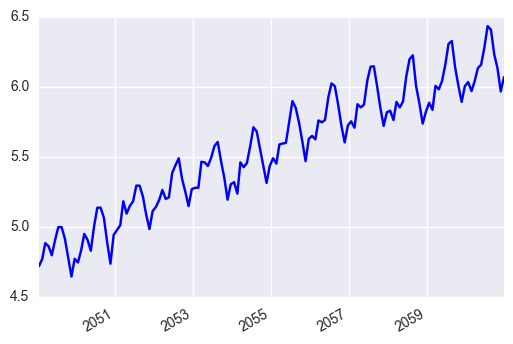

In [187]:
ts_log = np.log(ts)
draw_ts(ts_log)

NameError: global name 'rolmean' is not defined

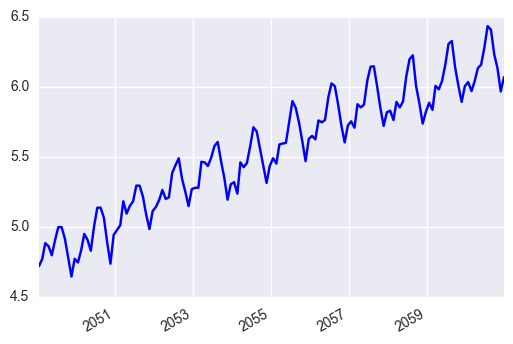

In [188]:
draw_trend(ts_log, 12)